In [1]:
import sys
import json
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

sys.path.append('../')
from src.util.functions import Functions
from src.visualize.visualizer import ChoroplethMap

level = 'regioni'

path_data = '../data'
path_img = '{path_data}/imgs/mappe/{level}'.format(path_data=path_data, level=level)
path_csv = '{path_data}/csv'.format(path_data=path_data)
path_geojson = '{path_data}/geojson'.format(path_data=path_data)

csv_in_name = '{path_csv}/covid19-{level}.csv'.format(path_csv=path_csv, level=level)
geojson_regions_name = '{path_geojson}/Italy_NUTS_2.json'.format(path_geojson=path_geojson)

In [2]:
# Read geojson NUTS 2 file
with open(geojson_regions_name, encoding='utf-8') as geojson_regions:
    json_regions = json.load(geojson_regions)
properties = json_regions['features'][0]['properties']
properties

{'reg_name': 'Piemonte', 'reg_istat_code_num': 1, 'reg_istat_code': '01'}

In [3]:
df_r = pd.read_csv(csv_in_name)
last_date = df_r.data[0].split('T')[0]
# df_r.sort_values(by='codice_regione').reset_index(drop=True)
df_r.columns;
# totale_ospedalizzati = ricoverati_con_sintomi + terapia_intensiva
# totale_positivi = totale_ospedalizzati + isolamento_domiciliare
# variazione_totale_positivi = totale_positivi(S) - totale_positivi(S - 1)
# totale_casi = totale_positivi + dimessi_guariti + deceduti

In [4]:
# Define figures properties
fig_prop = {'title': last_date,
            'path_root': path_img,
            'nuovi_positivi': {'colorbar_title': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
            'terapia_intensiva': {'colorbar_title': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
            'saturazione_terapia_intensiva': {'colorbar_title': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
            'totale_ospedalizzati': {'colorbar_title': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
            'variazione_nuovi_positivi': {'colorbar_title': 'Variazione nuovi positivi', 'file_name': 'variazione_nuovi_positivi'},
            'variazione_terapia_intensiva': {'colorbar_title': 'Variazione terapia intensiva', 'file_name': 'variazione_terapia_intensiva'},
            'variazione_totale_ospedalizzati': {'colorbar_title': 'Variazione totale ospedalizzati', 'file_name': 'variazione_totale_ospedalizzati'}}

In [5]:
# Construct object with dataframe and geojson data
cm = ChoroplethMap(df=df_r,
                   geo_map=json_regions,
                   geo_col='denominazione_regione',
                   geo_prop='properties.reg_name',
                   fig_prop=fig_prop)

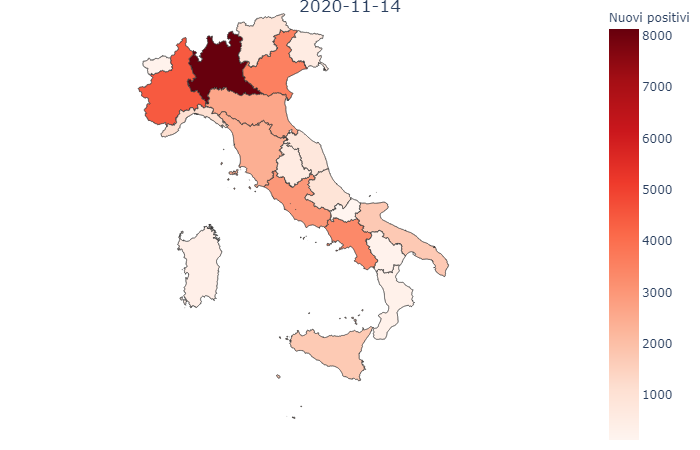

In [6]:
# New positives
col = 'nuovi_positivi'
fig = cm.draw_map(col=col)
cm.save(fig=fig, col=col)

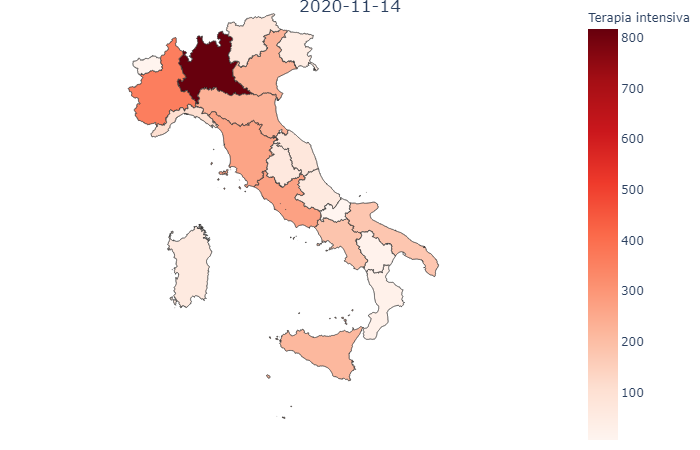

In [7]:
# Positives in ICU
col = 'terapia_intensiva'
fig = cm.draw_map(col=col)
cm.save(fig=fig, col=col)

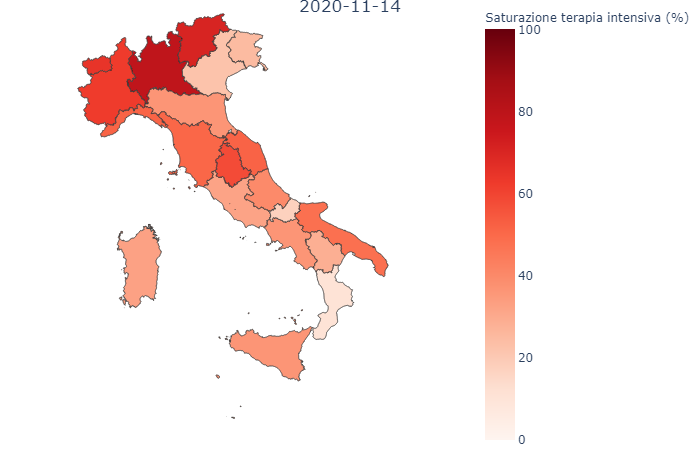

In [8]:
# ICU saturation
col = 'saturazione_terapia_intensiva'
fig = cm.draw_map(col=col, zmin=0, zmax=100)
cm.save(fig=fig, col=col)

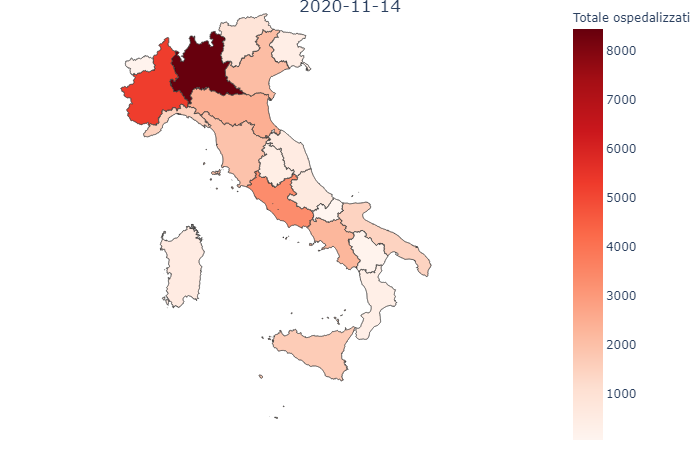

In [9]:
# Hospitalized positives
col = 'totale_ospedalizzati'
fig = cm.draw_map(col=col)
cm.save(fig=fig, col=col)

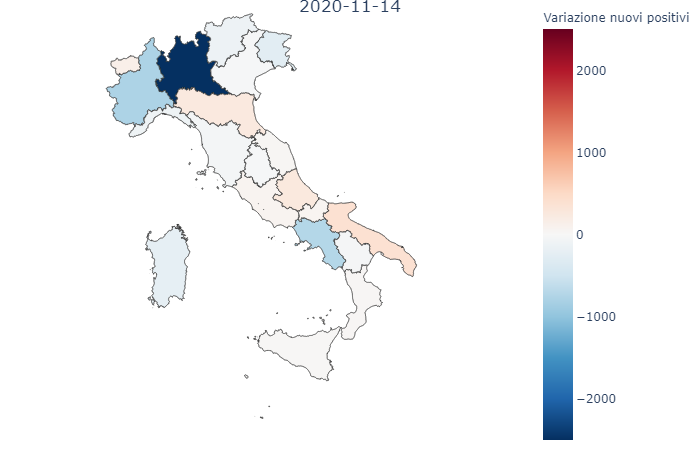

In [10]:
# Variation of new positives with respect to the day before
col = 'variazione_nuovi_positivi'
fig = cm.draw_map(col=col, color={'type': 'seq', 'scale': 'RdBu'}, zmid=0, reversescale=True)
cm.save(fig=fig, col=col)

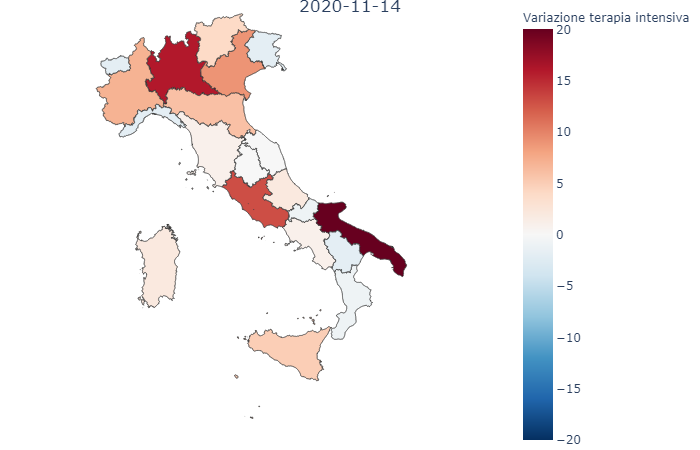

In [11]:
# Variation of positives in ICU with respect to the day before
col = 'variazione_terapia_intensiva'
fig = cm.draw_map(col=col, color={'type': 'seq', 'scale': 'RdBu'}, zmid=0, reversescale=True)
cm.save(fig=fig, col=col)

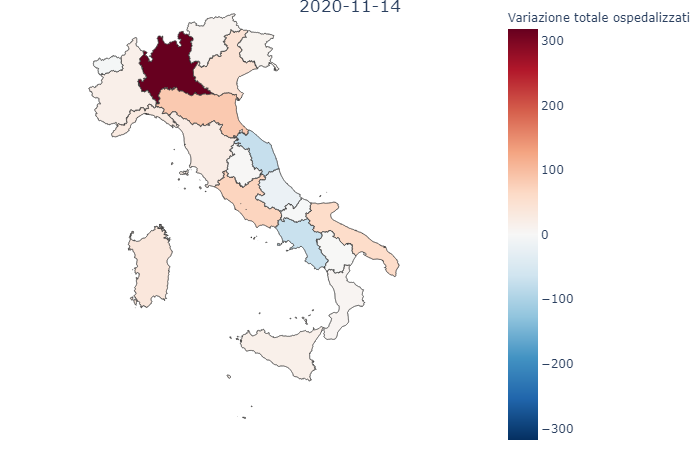

In [12]:
# Variation of hospitalized positives with respect to the day before
col = 'variazione_totale_ospedalizzati'
fig = cm.draw_map(col=col, color={'type': 'seq', 'scale': 'RdBu'}, zmid=0, reversescale=True)
cm.save(fig=fig, col=col)